# Data Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Genetic_Disorders.csv')
print(df.shape)

df.head()

(22083, 45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Test 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,0,0,0,0,0,1,0,0,0,0.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,0,0,1,0,0,0,0,0,0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,0,0,1,0,0,0,0,0,0.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,0,0,0,0,1,0,0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,1,0,0,0,0,0,0,0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender',
       'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
       'Place of birth', 'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Test 1', 'Test 2', 'Test 3', 'Test 4',

In [ ]:
# df.drop(['Test 1','Test 2','Test 3','Test 4','Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5'],axis=1,inplace=True)

In [ ]:
l = pd.get_dummies(df['Disorder Subclass'])
l.head()

,Alzheimer's,Cancer,Cystic fibrosis,Diabetes,Hemochromatosis,Leber's hereditary optic neuropathy,Leigh syndrome,Mitochondrial myopathy,Tay-Sachs
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0


In [ ]:
df['H/O radiation exposure (x-ray)'].value_counts()

Not applicable    4807
No                4764
Yes               4729
-                 4664
Name: H/O radiation exposure (x-ray), dtype: int64

In [ ]:
df.drop('Disorder Subclass',axis = 1,inplace=True)

In [ ]:
df = df.drop(['Patient Id','Parental consent','Test 5','Patient First Name', 'Family Name','Place of birth','Status', "Father's name",'Location of Institute','Institute Name'], axis = 1)

In [ ]:
print(df.shape)
df.head()

(22083, 34)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Normal (30-60),Normal,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,0,0,0,0,0,1,0,0,0,Mitochondrial genetic inheritance disorders
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Tachypnea,Normal,High,NaN,No,None,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,0,0,1,0,0,0,0,0,0,NaN
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Normal (30-60),Tachycardia,Low,NaN,No record,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,0,0,1,0,0,0,0,0,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Tachypnea,Normal,High,Male,Not available,No,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,0,0,0,0,1,0,0,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,1,0,0,0,0,0,0,0,Multifactorial genetic inheritance disorders


The Target Feature (Genetic Disorder)

In [ ]:
df['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [ ]:
df['Genetic Disorder'].isnull().sum()

3121

In [ ]:
df = df.dropna(subset = ['Genetic Disorder'], axis = 0)

In [ ]:
print(df.shape)

df.head()

(18962, 34)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Normal (30-60),Normal,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,0,0,0,0,0,1,0,0,0,Mitochondrial genetic inheritance disorders
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Normal (30-60),Tachycardia,Low,NaN,No record,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,0,0,1,0,0,0,0,0,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Tachypnea,Normal,High,Male,Not available,No,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,0,0,0,0,1,0,0,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,1,0,0,0,0,0,0,0,Multifactorial genetic inheritance disorders
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,NaN,Normal,Low,Female,Not available,None,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,0,0,1,0,0,0,0,0,0,Single-gene inheritance diseases


In [ ]:
df['Genetic Disorder'].isnull().sum()

0

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

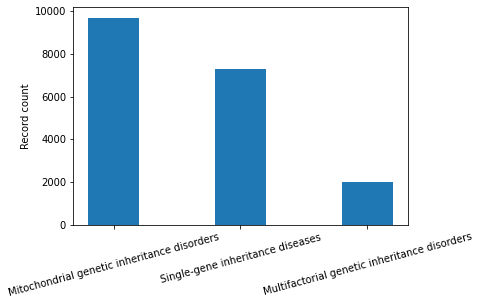

In [ ]:
# sns.countplot(df['Genetic Disorder'],)
plt.bar(x=df['Genetic Disorder'].value_counts().index,height = df['Genetic Disorder'].value_counts(),width = 0.4)
plt.ylabel("Record count")
plt.xticks(rotation = 15)

In [ ]:
df['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

The Variable Types

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2', 'Test 3', 'Test 4']


In [ ]:
categorical_features = [feature for feature in df.columns if feature not in numerical_features and feature != 'Genetic Disorder']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  18
["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


Missing Features

In [ ]:
missing_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0 and feature != 'Genetic Disorder']
print("Total number of missing features: ", len(missing_features))

print(missing_features)

Total number of missing features:  21
['Patient Age', 'Inherited from father', 'Maternal gene', "Mother's age", "Father's age", 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects', 'White Blood cell count (thousand per microliter)', 'Blood test result']


In [ ]:
df[missing_features].isnull().mean().sort_values(ascending = False)

Mother's age                                        0.259519
Father's age                                        0.258570
Maternal gene                                       0.122666
H/O substance abuse                                 0.095401
History of anomalies in previous pregnancies        0.094927
Follow-up                                           0.094188
Birth asphyxia                                      0.093872
White Blood cell count (thousand per microliter)    0.093028
Gender                                              0.092395
Respiratory Rate (breaths/min)                      0.092290
Birth defects                                       0.092237
Assisted conception IVF/ART                         0.092184
Blood test result                                   0.091762
H/O radiation exposure (x-ray)                      0.091710
H/O serious maternal illness                        0.091710
Folic acid details (peri-conceptional)              0.091393
Heart Rate (rates/min   

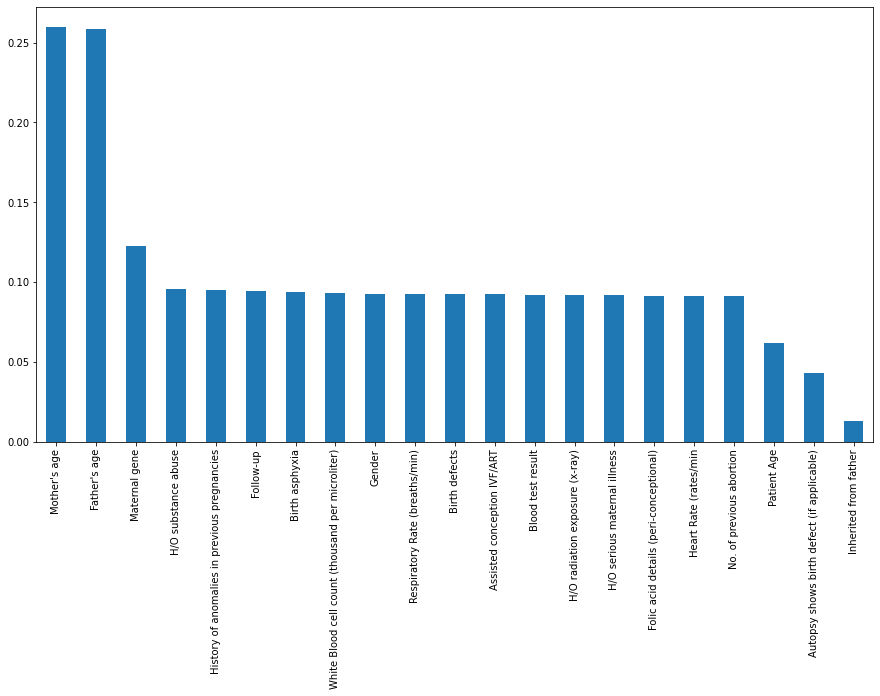

In [ ]:
plt.figure(figsize=(15, 8))
df[missing_features].isnull().mean().sort_values(ascending = False).plot.bar()

In [ ]:
print(df[missing_features].isnull().mean().sort_values(ascending = False).index.to_list()[4: 31])

find_common_na = df[missing_features].isnull().mean().sort_values(ascending = False).index.to_list()[4: 31]

['History of anomalies in previous pregnancies', 'Follow-up', 'Birth asphyxia', 'White Blood cell count (thousand per microliter)', 'Gender', 'Respiratory Rate (breaths/min)', 'Birth defects', 'Assisted conception IVF/ART', 'Blood test result', 'H/O radiation exposure (x-ray)', 'H/O serious maternal illness', 'Folic acid details (peri-conceptional)', 'Heart Rate (rates/min', 'No. of previous abortion', 'Patient Age', 'Autopsy shows birth defect (if applicable)', 'Inherited from father']


In [ ]:
numerical_features_na = [feature for feature in missing_features if df[feature].dtype != 'O']
print("Total number of numerical missing features: ", len(numerical_features_na))

print(numerical_features_na)

Total number of numerical missing features:  5
['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)']


In [ ]:
categorical_features_na = [feature for feature in missing_features if feature not in numerical_features_na]
print("Total number of categorical missing features: ", len(categorical_features_na))

print(categorical_features_na)

Total number of categorical missing features:  16
['Inherited from father', 'Maternal gene', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df0833790>,
      dtype=object)

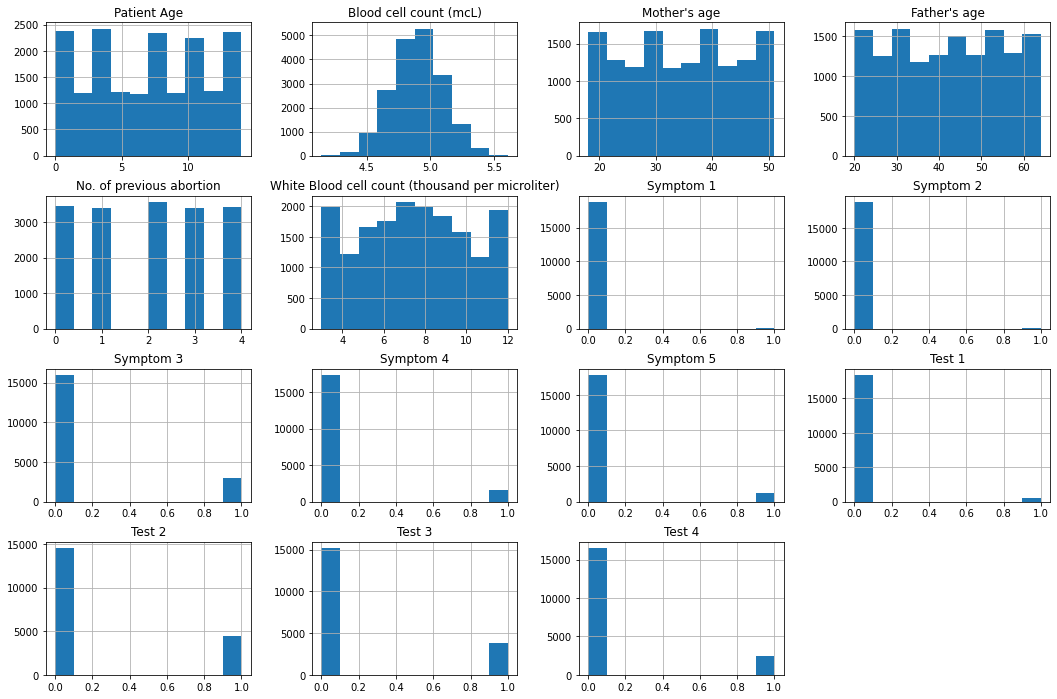

In [ ]:
df[numerical_features].hist(figsize=(18, 12))

In [ ]:
print(numerical_features)

['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2', 'Test 3', 'Test 4']


In [ ]:
def plot_hist(df, feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data = df, x=feature, kde=True)
    plt.ylabel('Record Count')

In [ ]:
!pip install feature_engine

from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser

def plot_discretisation(X_train, X_test, features, method, show_dict = False, show_minmax = False, q = 10, bins = 10):
    
    if method == 'efd':
        disc = EqualFrequencyDiscretiser(variables=features, q = q)
    elif method == 'ewd':
        disc = EqualWidthDiscretiser(variables=features, bins = bins)
    
    disc.fit(X_train)
    
    X_train = disc.transform(X_train)
    X_test = disc.transform(X_test)
    
    if show_minmax:
        print('Min: ', df[features].min())
        print('Max: ', df[features].max())

    if show_dict:
        print(disc.binner_dict_)
    
    df1 = X_train.groupby(features)[features].count() / len(X_train)
    df2 = X_test.groupby(features)[features].count() / len(X_test)
    
    temp_data = pd.concat([df1, df2], axis = 1)
    temp_data.columns = ['train', 'test']
    
    temp_data.plot.bar()
    plt.ylabel("Total number of observations per bin")
    

     |████████████████████████████████| 260 kB 9.9 MB/s 
     |████████████████████████████████| 9.8 MB 15.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


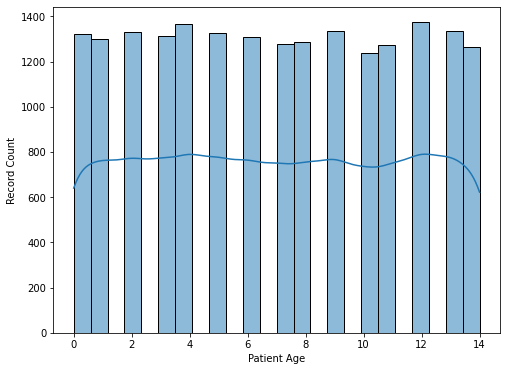

In [ ]:
plot_hist(df, 'Patient Age')

In [ ]:
print(df['Patient Age'].mean())
print(df['Patient Age'].median())
print(df['Patient Age'].mode()[0])

6.9737463458511355
7.0
12.0


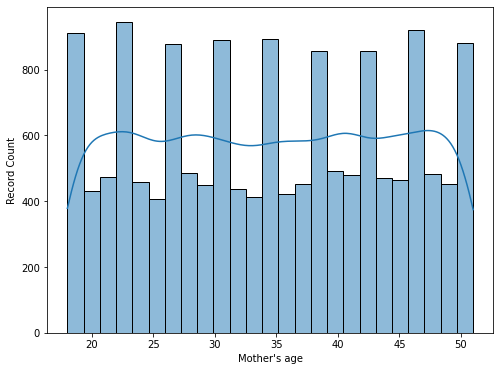

In [ ]:
plot_hist(df, "Mother's age")

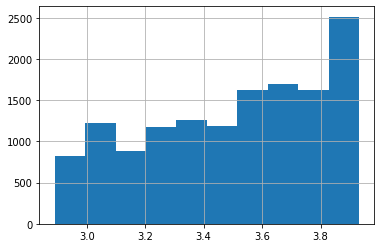

In [ ]:
np.log(df["Mother's age"]).hist()

In [ ]:
print(df["Mother's age"].mean())
print(df["Mother's age"].median())
print(df["Mother's age"].mode()[0])

34.54803788903924
35.0
40.0


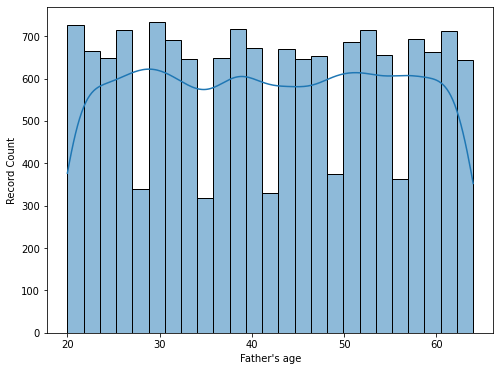

In [ ]:
plot_hist(df, "Father's age")

In [ ]:
print(df["Father's age"].mean())
print(df["Father's age"].median())
print(df["Father's age"].mode()[0])

41.9696279963013
42.0
20.0


In [ ]:
print(df['No. of previous abortion'].mean())
print(df['No. of previous abortion'].median())
print(df['No. of previous abortion'].mode()[0])

1.9977948003714021
2.0
2.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Genetic Disorder'], axis = 1),
                                                   df['Genetic Disorder'],
                                                   test_size=0.3,
                                                   random_state=22)

In [ ]:
median_imputation = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

X_train[median_imputation].isnull().sum()

Patient Age                  831
Mother's age                3450
Father's age                3426
No. of previous abortion    1218
dtype: int64

In [ ]:
for feature in median_imputation:
    median = X_train[feature].median()
    
    X_train[feature] = X_train[feature].fillna(median)
    X_test[feature] = X_test[feature].fillna(median)

In [ ]:
X_train[median_imputation].isnull().sum()

Patient Age                 0
Mother's age                0
Father's age                0
No. of previous abortion    0
dtype: int64

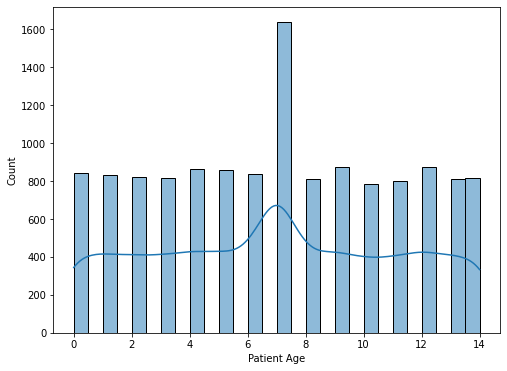

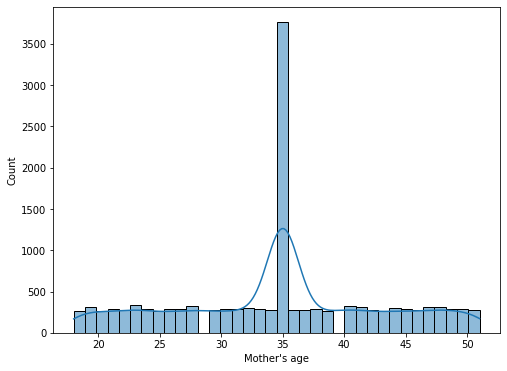

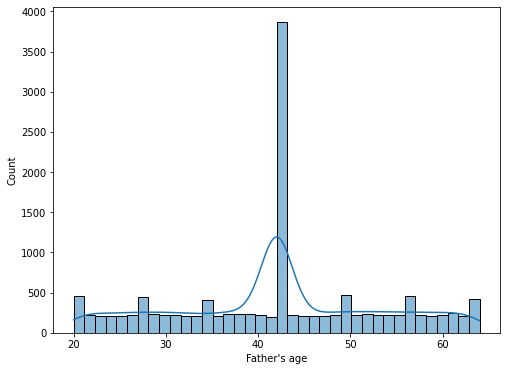

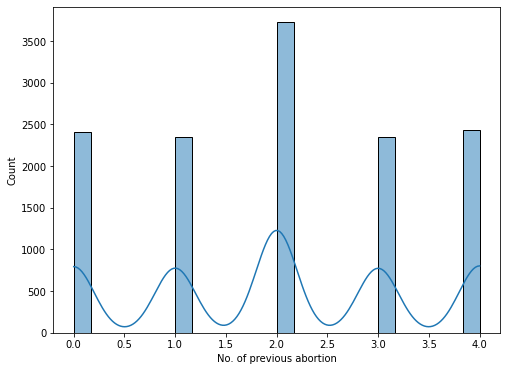

In [ ]:
for feature in median_imputation:
    plot_hist(X_train, feature)

In [ ]:
from feature_engine.imputation import RandomSampleImputer

random_imputation = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

random_sample = RandomSampleImputer(variables=random_imputation, random_state=22)
random_sample.fit(X_train)

X_train = random_sample.transform(X_train)
X_test = random_sample.transform(X_test)

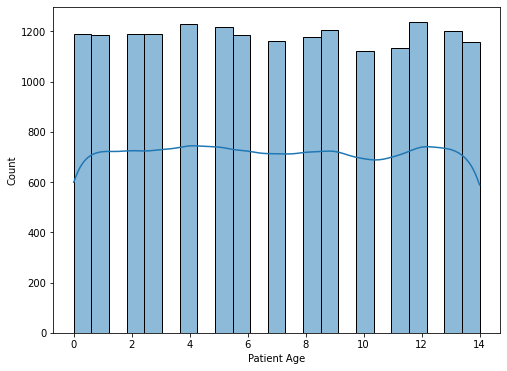

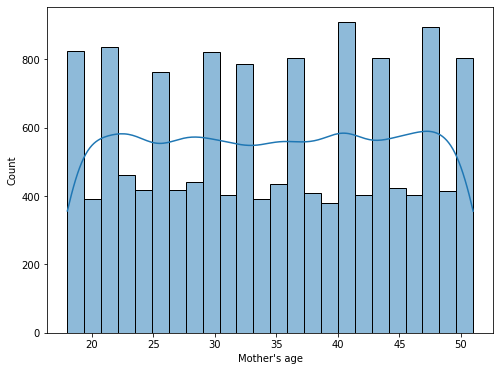

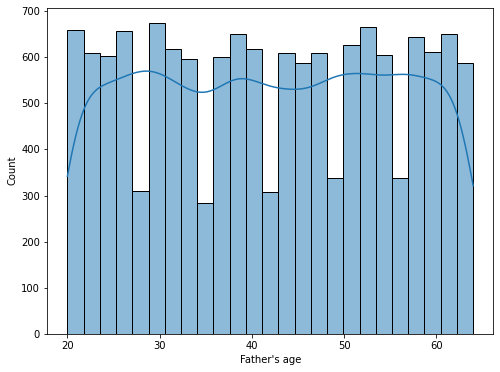

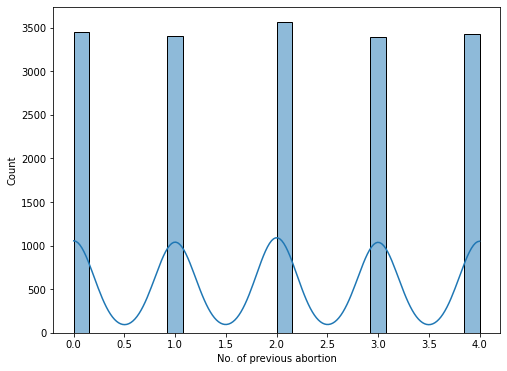

In [ ]:
for feature in random_imputation:
    plot_hist(df, feature)

In [ ]:
# plot_discretisation(X_train, X_test, method='efd', features = 'Patient Age', q = 5, show_dict = True, show_minmax = True)

{'Patient Age': [-inf, 4.666666666666667, 9.333333333333334, inf]}


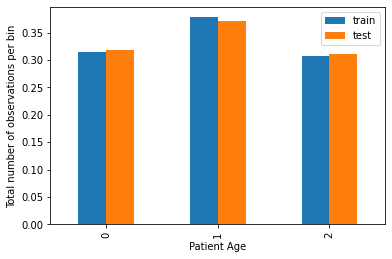

In [ ]:
# Check
plot_discretisation(X_train, X_test, method='ewd', features = 'Patient Age', bins = 3, show_dict = True)

"Mother's age"

Min:  18.0
Max:  51.0
{"Mother's age": [-inf, 33.0, 36.0, inf]}


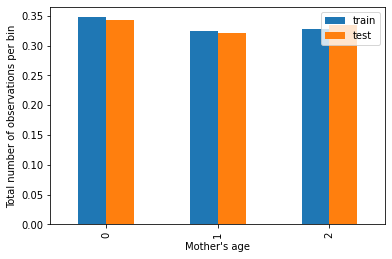

In [ ]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = "Mother's age", q = 3, show_dict = True, show_minmax = True)

In [ ]:
# plot_discretisation(X_train, X_test, method = 'ewd', features = "Mother's age", bins = 3, show_dict = True, show_minmax = True)

"Father's age"

Min:  20.0
Max:  64.0
{"Father's age": [-inf, 40.0, 44.0, inf]}


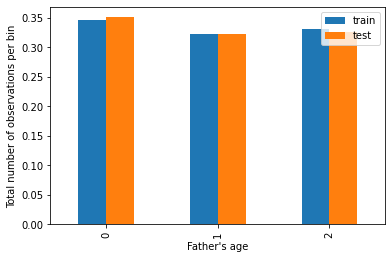

In [ ]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = "Father's age", q = 3, show_dict = True, show_minmax = True)

In [ ]:
# plot_discretisation(X_train, X_test, method = 'ewd', features = "Father's age", bins = 6, show_dict = True, show_minmax = True)

'No. of previous abortion'

Min:  0.0
Max:  4.0
{'No. of previous abortion': [-inf, 1.0, 2.0, 3.0, inf]}


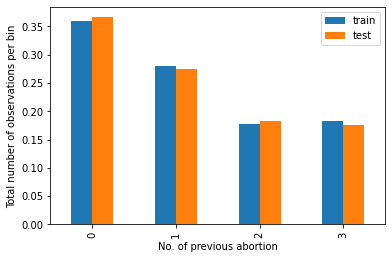

In [ ]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = 'No. of previous abortion', q = 4, show_dict = True, show_minmax = True)

In [ ]:
# plot_discretisation(X_train, X_test, method = 'ewd', features = 'No. of previous abortion', bins = 4, show_dict = True, show_minmax = True)

 White Blood cell count (thousand per microliter)

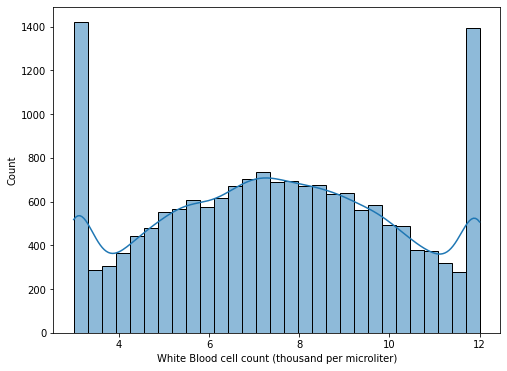

In [ ]:
plot_hist(df, 'White Blood cell count (thousand per microliter)')

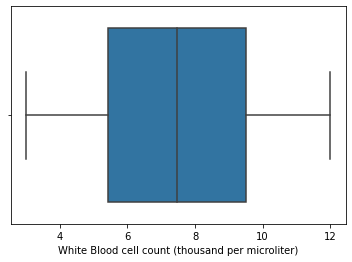

In [ ]:
sns.boxplot(x = df['White Blood cell count (thousand per microliter)'])

((array([-3.9659384 , -3.74911915, -3.63044878, ...,  3.63044878,
          3.74911915,  3.9659384 ]),
  array([ 3.,  3.,  3., ..., nan, nan, nan])),
 (nan, nan, nan))

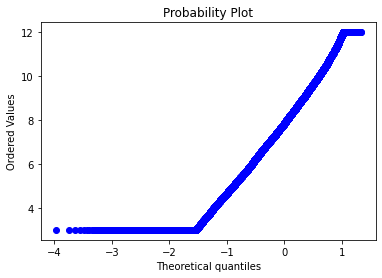

In [ ]:
stats.probplot(df['White Blood cell count (thousand per microliter)'], dist='norm', plot=plt)

In [ ]:
df['White Blood cell count (thousand per microliter)'].isnull().sum()

1764

In [ ]:
print(df['White Blood cell count (thousand per microliter)'].mean())
print(df['White Blood cell count (thousand per microliter)'].median())
print(df['White Blood cell count (thousand per microliter)'].mode()[0])

7.478735312109325
7.465056402
3.0


In [ ]:
median = df['White Blood cell count (thousand per microliter)'].median()

# df['White Blood cell count (thousand per microliter)'] = df['White Blood cell count (thousand per microliter)'].fillna(median)

In [ ]:
# plot_hist(df, 'White Blood cell count (thousand per microliter)')

In [ ]:
# Check
random_sample_wbc = RandomSampleImputer(variables=['White Blood cell count (thousand per microliter)'], random_state=22)
random_sample_wbc.fit(X_train)

X_train = random_sample_wbc.transform(X_train)
X_test = random_sample_wbc.transform(X_test)

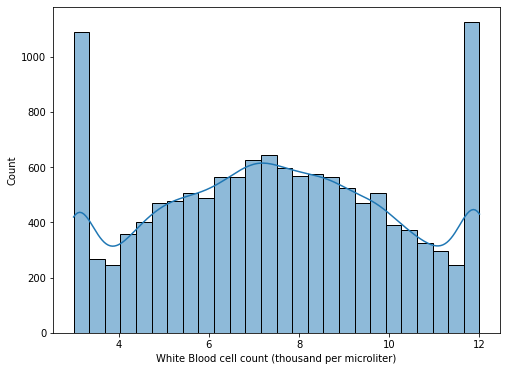

In [ ]:
plot_hist(X_train, 'White Blood cell count (thousand per microliter)')

((array([-3.9659384 , -3.74911915, -3.63044878, ...,  3.63044878,
          3.74911915,  3.9659384 ]),
  array([ 3.,  3.,  3., ..., nan, nan, nan])),
 (nan, nan, nan))

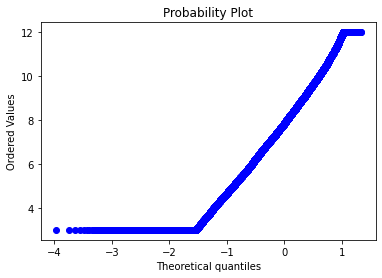

In [ ]:
stats.probplot(df['White Blood cell count (thousand per microliter)'], dist='norm', plot=plt)

In [ ]:
q3, q1 = np.percentile(df['White Blood cell count (thousand per microliter)'], [75, 25])
iqr = q3 - q1

low_lim = q1 - 0.5* iqr
up_lim = q3 + 0.5 * iqr

print('low_limit is', low_lim)
print('up_limit is', up_lim)
print()
outlier =[]
for x in df['White Blood cell count (thousand per microliter)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outliers in the dataset is', outlier)
print()
print("Total number of outliers: ", len(outlier))

low_limit is nan
up_limit is nan

Outliers in the dataset is []

Total number of outliers:  0


Min:  3.0
Max:  12.0
{'White Blood cell count (thousand per microliter)': [-inf, 3.121112842, 4.326710386, 5.082983373, 5.752755052, 6.382413097, 6.943168161, 7.461858464, 8.017682536, 8.587454028, 9.187657786999997, 9.851073699, 10.70821157, 11.939935779999999, inf]}


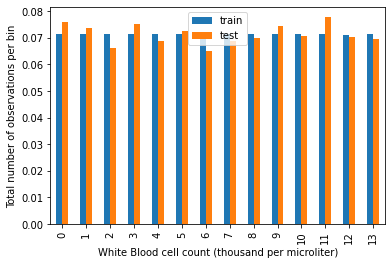

In [ ]:
# Check
plot_discretisation(X_train, X_test, features = 'White Blood cell count (thousand per microliter)', method = 'efd', q = 14, show_dict=True, show_minmax = True)

In [ ]:
# df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']].head(10)

In [ ]:
# df[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].head(10)

In [ ]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Normal (30-60),Normal,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,0,0,0,0,0,1,0,0,0,Mitochondrial genetic inheritance disorders
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Normal (30-60),Tachycardia,Low,NaN,No record,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,0,0,1,0,0,0,0,0,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Tachypnea,Normal,High,Male,Not available,No,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,0,0,0,0,1,0,0,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,1,0,0,0,0,0,0,0,Multifactorial genetic inheritance disorders
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,NaN,Normal,Low,Female,Not available,None,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,0,0,1,0,0,0,0,0,0,Single-gene inheritance diseases


In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2', 'Test 3', 'Test 4']


In [ ]:
df[numerical_features].isnull().mean().sort_values(ascending=False)

Mother's age                                        0.259519
Father's age                                        0.258570
White Blood cell count (thousand per microliter)    0.093028
No. of previous abortion                            0.091235
Patient Age                                         0.061913
Blood cell count (mcL)                              0.000000
Symptom 1                                           0.000000
Symptom 2                                           0.000000
Symptom 3                                           0.000000
Symptom 4                                           0.000000
Symptom 5                                           0.000000
Test 1                                              0.000000
Test 2                                              0.000000
Test 3                                              0.000000
Test 4                                              0.000000
dtype: float64

In [ ]:
print(df.shape)
df.head()

(18962, 34)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Normal (30-60),Normal,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,0,0,0,0,0,1,0,0,0,Mitochondrial genetic inheritance disorders
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Normal (30-60),Tachycardia,Low,NaN,No record,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,0,0,1,0,0,0,0,0,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Tachypnea,Normal,High,Male,Not available,No,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,0,0,0,0,1,0,0,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,1,0,0,0,0,0,0,0,Multifactorial genetic inheritance disorders
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,NaN,Normal,Low,Female,Not available,None,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,0,0,1,0,0,0,0,0,0,Single-gene inheritance diseases


Categorical Features

In [ ]:
print(categorical_features)

["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


In [ ]:
df[categorical_features_na].isnull().mean().sort_values(ascending=False)

Maternal gene                                   0.122666
H/O substance abuse                             0.095401
History of anomalies in previous pregnancies    0.094927
Follow-up                                       0.094188
Birth asphyxia                                  0.093872
Gender                                          0.092395
Respiratory Rate (breaths/min)                  0.092290
Birth defects                                   0.092237
Assisted conception IVF/ART                     0.092184
Blood test result                               0.091762
H/O serious maternal illness                    0.091710
H/O radiation exposure (x-ray)                  0.091710
Folic acid details (peri-conceptional)          0.091393
Heart Rate (rates/min                           0.091235
Autopsy shows birth defect (if applicable)      0.042928
Inherited from father                           0.012973
dtype: float64

####'Maternal gene': fillna() -> Yes

In [ ]:
df['Maternal gene'].value_counts()

Yes    9191
No     7445
Name: Maternal gene, dtype: int64

In [ ]:
df['Maternal gene'].isna().sum()

2326

In [ ]:
df['Maternal gene'] = df['Maternal gene'].fillna('Yes')

In [ ]:
df['Maternal gene'].isna().sum()

0

 'H/O substance abuse': convert nan's to '-' and convert '-' to 'Missing'

In [ ]:
df['H/O substance abuse'].value_counts()

No                4373
-                 4328
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

In [ ]:
df['H/O substance abuse'].isna().sum()

1809

In [ ]:
df['H/O substance abuse'] = np.where(df['H/O substance abuse'].isna(), '-', df['H/O substance abuse'])

In [ ]:
df['H/O substance abuse'].value_counts()

-                 6137
No                4373
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

In [ ]:
df['H/O substance abuse'] = np.where(df['H/O substance abuse'] == '-', 'Missing', df['H/O substance abuse'])

In [ ]:
df['H/O substance abuse'].value_counts()

Missing           6137
No                4373
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

Inherited from father: Fillna() -> Yes

In [ ]:
df['Inherited from father'].value_counts()

No     11293
Yes     7423
Name: Inherited from father, dtype: int64

In [ ]:
df['Inherited from father'].isna().sum()

246

In [ ]:
df['Inherited from father'] = df['Inherited from father'].fillna('Yes')

In [ ]:
df['Inherited from father'].isna().sum()

0

Autopsy shows birth defect (if applicable): Fillna() -> None

In [ ]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    9543
Yes               2929
None              2921
No                2755
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [ ]:
df['Autopsy shows birth defect (if applicable)'].isna().sum()

814

In [ ]:
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].fillna('None')

In [ ]:
df['Autopsy shows birth defect (if applicable)'].isna().sum()

0

In [ ]:
to_remove = ['Maternal gene', 'H/O substance abuse', 'Inherited from father', 'Autopsy shows birth defect (if applicable)']

for feature in to_remove:
    categorical_features.remove(feature)

In [ ]:
categorical_features

["Genes in mother's side",
 'Paternal gene',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result']

In [ ]:
for feature in categorical_features:
    print(feature)
    print(df[feature].value_counts())
    
    print()

Genes in mother's side
Yes    11268
No      7694
Name: Genes in mother's side, dtype: int64

Paternal gene
No     10735
Yes     8227
Name: Paternal gene, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    8686
Tachypnea         8526
Name: Respiratory Rate (breaths/min), dtype: int64

Heart Rate (rates/min
Normal         8815
Tachycardia    8417
Name: Heart Rate (rates/min, dtype: int64

Follow-up
Low     8685
High    8491
Name: Follow-up, dtype: int64

Gender
Ambiguous    5777
Male         5750
Female       5683
Name: Gender, dtype: int64

Birth asphyxia
Yes              4400
Not available    4309
No record        4286
No               4187
Name: Birth asphyxia, dtype: int64

Folic acid details (peri-conceptional)
Yes    8743
No     8486
Name: Folic acid details (peri-conceptional), dtype: int64

H/O serious maternal illness
No     8620
Yes    8603
Name: H/O serious maternal illness, dtype: int64

H/O radiation exposure (x-ray)
Not applicable    4394
Yes               4307


###Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Genetic Disorder'], axis = 1),
                                                   df['Genetic Disorder'],
                                                   test_size=0.3,
                                                   random_state=12)

The Variables Type

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2', 'Test 3', 'Test 4']


In [ ]:
categorical_features = [feature for feature in df.columns if feature not in numerical_features and feature != 'Disorder Subclass']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  19
["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Genetic Disorder']


Numerical Features

In [ ]:
X_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4
16798,14.0,Yes,Yes,Yes,No,5.142764,42.0,24.0,Normal (30-60),Tachycardia,Low,Male,Not available,None,Yes,Yes,Not applicable,Yes,Yes,Yes,2.0,Multiple,9.696442,inconclusive,0,0,0,1,0,0,0,0,0
462,9.0,Yes,No,No,Yes,5.479132,40.0,57.0,Tachypnea,Normal,Low,Ambiguous,Yes,Not applicable,Yes,No,Not applicable,Yes,Yes,Yes,0.0,Multiple,10.774366,NaN,0,0,0,0,0,0,0,0,0
18753,8.0,Yes,Yes,No,Yes,4.957490,20.0,62.0,Tachypnea,Tachycardia,High,Male,Yes,Not applicable,Yes,No,-,Not applicable,No,Yes,2.0,Multiple,12.000000,slightly abnormal,0,0,0,0,0,1,0,0,0
6944,5.0,No,Yes,No,Yes,4.965716,31.0,41.0,Normal (30-60),NaN,Low,Female,Not available,None,Yes,No,NaN,No,No,No,0.0,Multiple,3.230518,inconclusive,0,0,0,0,0,0,0,0,1
5793,4.0,No,Yes,No,No,4.906649,33.0,51.0,Tachypnea,Normal,Low,Female,No,Yes,No,No,Yes,Missing,No,No,1.0,Singular,4.584743,inconclusive,0,1,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4
7582,7.0,No,Yes,No,Yes,4.834507,48.0,NaN,Normal (30-60),Tachycardia,Low,Male,No,Not applicable,Yes,No,NaN,Not applicable,No,No,0.0,Multiple,NaN,NaN,0,0,0,0,0,0,1,0,0
9,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Tachypnea,Tachycardia,Low,Male,No,Not applicable,Yes,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,0,0,0,1,0,0,0,0,0
8378,12.0,No,Yes,Yes,No,4.927676,31.0,35.0,Tachypnea,Normal,NaN,Male,No record,No,No,No,No,No,Yes,Yes,NaN,Multiple,6.634715,inconclusive,0,0,0,0,0,0,0,0,0
1793,10.0,Yes,Yes,Yes,Yes,4.890596,36.0,50.0,Tachypnea,Tachycardia,High,Male,Yes,Yes,No,Yes,No,Yes,Yes,Yes,0.0,Singular,6.697526,normal,0,0,0,1,0,0,0,0,0
1776,7.0,Yes,No,Yes,No,5.033976,NaN,61.0,NaN,Tachycardia,Low,Female,No record,Yes,No,Yes,Not applicable,Missing,Yes,No,2.0,Multiple,5.138692,inconclusive,0,0,1,0,0,0,0,0,0


Missing Features

In [ ]:
numerical_features = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2', 'Test 3', 'Test 4']


In [ ]:
missing_features = [feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0]
print("Total number of missing features: ", len(missing_features))

print(missing_features)

Total number of missing features:  17
['Patient Age', "Mother's age", "Father's age", 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects', 'White Blood cell count (thousand per microliter)', 'Blood test result']


In [ ]:
numerical_features_na = [feature for feature in missing_features if X_train[feature].dtype != 'O']
print("Total number of numerical missing features: ", len(numerical_features_na))

print(numerical_features_na)

Total number of numerical missing features:  5
['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)']


In [ ]:
categorical_features_na = [feature for feature in missing_features if feature not in numerical_features_na]
print("Total number of categorical missing features: ", len(categorical_features_na))

print(categorical_features_na)

Total number of categorical missing features:  12
['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


Numerical Features

In [ ]:
X_train[numerical_features_na].isnull().mean().sort_values(ascending = False)

Mother's age                                        0.259173
Father's age                                        0.257063
White Blood cell count (thousand per microliter)    0.093875
No. of previous abortion                            0.091615
Patient Age                                         0.064040
dtype: float64

Random Sample Imputation

In [ ]:
from feature_engine.imputation import RandomSampleImputer 

In [ ]:
random_sample_imputer = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)']

random_sample = RandomSampleImputer(variables=random_sample_imputer, random_state=22)
random_sample.fit(X_train)

X_train = random_sample.transform(X_train)
X_test = random_sample.transform(X_test)

In [ ]:
X_train[numerical_features].isnull().sum()

Patient Age                                         0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
No. of previous abortion                            0
White Blood cell count (thousand per microliter)    0
Symptom 1                                           0
Symptom 2                                           0
Symptom 3                                           0
Symptom 4                                           0
Symptom 5                                           0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
dtype: int64

Discretisation

In [ ]:
ewd_b3 = ['Patient Age']
ewd_b4 = ['No. of previous abortion']
efd_q3 = ["Mother's age", "Father's age"]
efd_q14 = ['White Blood cell count (thousand per microliter)']

In [ ]:
from feature_engine.discretisation import EqualWidthDiscretiser

disc_b4 = EqualWidthDiscretiser(bins=4, variables = ewd_b4)
disc_b4.fit(X_train)

X_train = disc_b4.transform(X_train)
X_test = disc_b4.transform(X_test)

In [ ]:
disc_b3 = EqualWidthDiscretiser(bins=3, variables = ewd_b3)
disc_b3.fit(X_train)

X_train = disc_b3.transform(X_train)
X_test = disc_b3.transform(X_test)

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc_q3 = EqualFrequencyDiscretiser(q=3, variables = efd_q3)
disc_q3.fit(X_train)

X_train = disc_q3.transform(X_train)
X_test = disc_q3.transform(X_test)

In [ ]:
disc_q14 = EqualFrequencyDiscretiser(q = 14, variables = efd_q14)
disc_q14.fit(X_train)

X_train = disc_q14.transform(X_train)
X_test = disc_q14.transform(X_test)

Categorical Features

In [ ]:
X_train[categorical_features_na].isnull().mean().sort_values(ascending = False)

History of anomalies in previous pregnancies    0.097190
Follow-up                                       0.095683
Birth asphyxia                                  0.095156
Respiratory Rate (breaths/min)                  0.093272
Heart Rate (rates/min                           0.092745
Gender                                          0.092519
Birth defects                                   0.092217
H/O radiation exposure (x-ray)                  0.091615
Assisted conception IVF/ART                     0.091389
Folic acid details (peri-conceptional)          0.091087
H/O serious maternal illness                    0.090710
Blood test result                               0.089806
dtype: float64


 #### Maternal gene

In [ ]:
X_train['Maternal gene'].value_counts()

Yes    8082
No     5191
Name: Maternal gene, dtype: int64

In [ ]:
X_train['Maternal gene'].isna().sum()

0

In [ ]:
mode = X_train['Maternal gene'].mode()[0]
print(mode)
X_train['Maternal gene'] = X_train['Maternal gene'].fillna(mode)
X_test['Maternal gene'] = X_test['Maternal gene'].fillna(mode)

Yes


 'H/O substance abuse': convert nan's to '-' and convert '-' to 'Missing'm

In [ ]:
X_train['H/O substance abuse'].value_counts()

Missing           4294
Yes               3050
No                3035
Not applicable    2894
Name: H/O substance abuse, dtype: int64

In [ ]:
X_train['H/O substance abuse'].isna().sum()

0

In [ ]:
X_train['H/O substance abuse'] = np.where(X_train['H/O substance abuse'].isna(), '-', X_train['H/O substance abuse'])
X_test['H/O substance abuse'] = np.where(X_test['H/O substance abuse'].isna(), '-', X_test['H/O substance abuse'])

In [ ]:
X_train['H/O substance abuse'].value_counts()

Missing           4294
Yes               3050
No                3035
Not applicable    2894
Name: H/O substance abuse, dtype: int64

In [ ]:
X_train['H/O substance abuse'] = np.where(X_train['H/O substance abuse'] == '-', 'Missing', X_train['H/O substance abuse'])
X_test['H/O substance abuse'] = np.where(X_test['H/O substance abuse'] == '-', 'Missing', X_test['H/O substance abuse'])

In [ ]:
X_train['H/O substance abuse'].value_counts()

Missing           4294
Yes               3050
No                3035
Not applicable    2894
Name: H/O substance abuse, dtype: int64

Inherited from father: Fillna() -> Yes

In [ ]:
X_train['Inherited from father'].value_counts()

No     7857
Yes    5416
Name: Inherited from father, dtype: int64

In [ ]:
X_train['Inherited from father'].isna().sum()

0

In [ ]:
X_train['Inherited from father'] = X_train['Inherited from father'].fillna('Yes')
X_test['Inherited from father'] = X_test['Inherited from father'].fillna('Yes')

In [ ]:
X_train['Inherited from father'].value_counts()

No     7857
Yes    5416
Name: Inherited from father, dtype: int64

In [ ]:
X_train['Inherited from father'].isna().sum()

0

Autopsy shows birth defect (if applicable): Fillna() -> None

In [ ]:
X_train['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    6676
None              2599
Yes               2050
No                1948
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [ ]:
X_train['Autopsy shows birth defect (if applicable)'].isna().sum()

0

In [ ]:
X_train['Autopsy shows birth defect (if applicable)'] = X_train['Autopsy shows birth defect (if applicable)'].fillna('None')
X_test['Autopsy shows birth defect (if applicable)'] = X_test['Autopsy shows birth defect (if applicable)'].fillna('None')

In [ ]:
X_train['Autopsy shows birth defect (if applicable)'].isna().sum()

0

# Oversampling

In [ ]:
# from imblearn.over_sampling import SMOTENC

# smnc = SMOTENC(
#     sampling_strategy='auto',
#     random_state=12,  
#     k_neighbors=1000,
#     n_jobs=4,
#     categorical_features=[1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 31] 
# )  

# X_train, y_train = smnc.fit_resample(X_train, y_train)

## Categorical Encoding

In [ ]:
X_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4
16798,2,Yes,Yes,Yes,No,5.142764,2,0,Normal (30-60),Tachycardia,Low,Male,Not available,None,Yes,Yes,Not applicable,Yes,Yes,Yes,1,Multiple,10,inconclusive,0,0,0,1,0,0,0,0,0
462,1,Yes,No,No,Yes,5.479132,1,2,Tachypnea,Normal,Low,Ambiguous,Yes,Not applicable,Yes,No,Not applicable,Yes,Yes,Yes,0,Multiple,12,NaN,0,0,0,0,0,0,0,0,0
18753,1,Yes,Yes,No,Yes,4.957490,0,2,Tachypnea,Tachycardia,High,Male,Yes,Not applicable,Yes,No,-,Not applicable,No,Yes,1,Multiple,13,slightly abnormal,0,0,0,0,0,1,0,0,0
6944,1,No,Yes,No,Yes,4.965716,1,1,Normal (30-60),NaN,Low,Female,Not available,None,Yes,No,NaN,No,No,No,0,Multiple,1,inconclusive,0,0,0,0,0,0,0,0,1
5793,0,No,Yes,No,No,4.906649,1,2,Tachypnea,Normal,Low,Female,No,Yes,No,No,Yes,Missing,No,No,0,Singular,2,inconclusive,0,1,0,0,0,0,0,0,0


In [ ]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  18
["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


In [ ]:
for feature in categorical_features:
    print(feature)
    print(X_train[feature].value_counts())
    
    print()

Genes in mother's side
Yes    7900
No     5373
Name: Genes in mother's side, dtype: int64

Inherited from father
No     7857
Yes    5416
Name: Inherited from father, dtype: int64

Maternal gene
Yes    8082
No     5191
Name: Maternal gene, dtype: int64

Paternal gene
No     7509
Yes    5764
Name: Paternal gene, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    6071
Tachypnea         5964
Name: Respiratory Rate (breaths/min), dtype: int64

Heart Rate (rates/min
Normal         6126
Tachycardia    5916
Name: Heart Rate (rates/min, dtype: int64

Follow-up
Low     6061
High    5942
Name: Follow-up, dtype: int64

Gender
Male         4071
Ambiguous    4015
Female       3959
Name: Gender, dtype: int64

Birth asphyxia
Yes              3063
Not available    3059
No record        2960
No               2928
Name: Birth asphyxia, dtype: int64

Autopsy shows birth defect (if applicable)
Not applicable    6676
None              2599
Yes               2050
No                1948
Name: Auto

In [ ]:
X_train[categorical_features].isnull().sum()

Genes in mother's side                             0
Inherited from father                              0
Maternal gene                                      0
Paternal gene                                      0
Respiratory Rate (breaths/min)                  1238
Heart Rate (rates/min                           1231
Follow-up                                       1270
Gender                                          1228
Birth asphyxia                                  1263
Autopsy shows birth defect (if applicable)         0
Folic acid details (peri-conceptional)          1209
H/O serious maternal illness                    1204
H/O radiation exposure (x-ray)                  1216
H/O substance abuse                                0
Assisted conception IVF/ART                     1213
History of anomalies in previous pregnancies    1290
Birth defects                                   1224
Blood test result                               1192
dtype: int64

In [ ]:
categorical_features_na = [feature for feature in categorical_features if X_train[feature].isnull().sum() > 0]
print("Total number of features with missing categorical features: ", len(categorical_features_na))

print(categorical_features_na)

Total number of features with missing categorical features:  12
['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']


In [ ]:
for feature in categorical_features_na:
    print(feature)
    print(X_train[feature].value_counts())
    print()
    print(X_train[feature].isnull().sum())
    
    print("----------------------------------")

Respiratory Rate (breaths/min)
Normal (30-60)    6071
Tachypnea         5964
Name: Respiratory Rate (breaths/min), dtype: int64

1238
----------------------------------
Heart Rate (rates/min
Normal         6126
Tachycardia    5916
Name: Heart Rate (rates/min, dtype: int64

1231
----------------------------------
Follow-up
Low     6061
High    5942
Name: Follow-up, dtype: int64

1270
----------------------------------
Gender
Male         4071
Ambiguous    4015
Female       3959
Name: Gender, dtype: int64

1228
----------------------------------
Birth asphyxia
Yes              3063
Not available    3059
No record        2960
No               2928
Name: Birth asphyxia, dtype: int64

1263
----------------------------------
Folic acid details (peri-conceptional)
Yes    6118
No     5946
Name: Folic acid details (peri-conceptional), dtype: int64

1209
----------------------------------
H/O serious maternal illness
No     6112
Yes    5957
Name: H/O serious maternal illness, dtype: int64

1204


In [ ]:
for feature in categorical_features_na:
    mode = X_train[feature].mode()[0]
    
    X_train[feature] = X_train[feature].fillna(mode)
    X_test[feature] = X_test[feature].fillna(mode)

In [ ]:
for feature in categorical_features_na:
    print(feature)
    print(X_train[feature].value_counts())
    print()
    print(X_train[feature].isnull().sum())
    
    print("----------------------------------")

Respiratory Rate (breaths/min)
Normal (30-60)    7309
Tachypnea         5964
Name: Respiratory Rate (breaths/min), dtype: int64

0
----------------------------------
Heart Rate (rates/min
Normal         7357
Tachycardia    5916
Name: Heart Rate (rates/min, dtype: int64

0
----------------------------------
Follow-up
Low     7331
High    5942
Name: Follow-up, dtype: int64

0
----------------------------------
Gender
Male         5299
Ambiguous    4015
Female       3959
Name: Gender, dtype: int64

0
----------------------------------
Birth asphyxia
Yes              4326
Not available    3059
No record        2960
No               2928
Name: Birth asphyxia, dtype: int64

0
----------------------------------
Folic acid details (peri-conceptional)
Yes    7327
No     5946
Name: Folic acid details (peri-conceptional), dtype: int64

0
----------------------------------
H/O serious maternal illness
No     7316
Yes    5957
Name: H/O serious maternal illness, dtype: int64

0
---------------------

 One Hot Encoding

In [ ]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(drop_last=False, variables=categorical_features)
encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genes in mother's side_Yes,Genes in mother's side_No,Inherited from father_Yes,Inherited from father_No,Maternal gene_Yes,Maternal gene_No,Paternal gene_No,Paternal gene_Yes,Respiratory Rate (breaths/min)_Normal (30-60),Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Heart Rate (rates/min_Normal,Follow-up_Low,Follow-up_High,Gender_Male,Gender_Ambiguous,Gender_Female,Birth asphyxia_Not available,Birth asphyxia_Yes,Birth asphyxia_No,Birth asphyxia_No record,Autopsy shows birth defect (if applicable)_None,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Autopsy shows birth defect (if applicable)_No,Folic acid details (peri-conceptional)_Yes,Folic acid details (peri-conceptional)_No,H/O serious maternal illness_Yes,H/O serious maternal illness_No,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_-,H/O radiation exposure (x-ray)_Yes,H/O radiation exposure (x-ray)_No,H/O substance abuse_Yes,H/O substance abuse_Not applicable,H/O substance abuse_No,H/O substance abuse_Missing,Assisted conception IVF/ART_Yes,Assisted conception IVF/ART_No,History of anomalies in previous pregnancies_Yes,History of anomalies in previous pregnancies_No,Birth defects_Multiple,Birth defects_Singular,Blood test result_inconclusive,Blood test result_slightly abnormal,Blood test result_normal,Blood test result_abnormal
16798,2,5.142764,2,0,1,10,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
462,1,5.479132,1,2,0,12,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0
18753,1,4.957490,0,2,1,13,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0
6944,1,4.965716,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0
5793,0,4.906649,1,2,0,2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0


In [ ]:
X_train.shape

(13273, 62)

In [ ]:
X_test.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genes in mother's side_Yes,Genes in mother's side_No,Inherited from father_Yes,Inherited from father_No,Maternal gene_Yes,Maternal gene_No,Paternal gene_No,Paternal gene_Yes,Respiratory Rate (breaths/min)_Normal (30-60),Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Heart Rate (rates/min_Normal,Follow-up_Low,Follow-up_High,Gender_Male,Gender_Ambiguous,Gender_Female,Birth asphyxia_Not available,Birth asphyxia_Yes,Birth asphyxia_No,Birth asphyxia_No record,Autopsy shows birth defect (if applicable)_None,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Autopsy shows birth defect (if applicable)_No,Folic acid details (peri-conceptional)_Yes,Folic acid details (peri-conceptional)_No,H/O serious maternal illness_Yes,H/O serious maternal illness_No,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_-,H/O radiation exposure (x-ray)_Yes,H/O radiation exposure (x-ray)_No,H/O substance abuse_Yes,H/O substance abuse_Not applicable,H/O substance abuse_No,H/O substance abuse_Missing,Assisted conception IVF/ART_Yes,Assisted conception IVF/ART_No,History of anomalies in previous pregnancies_Yes,History of anomalies in previous pregnancies_No,Birth defects_Multiple,Birth defects_Singular,Blood test result_inconclusive,Blood test result_slightly abnormal,Blood test result_normal,Blood test result_abnormal
7582,1,4.834507,2,2,0,2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0
9,0,4.752272,2,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
8378,2,4.927676,1,1,0,5,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0
1793,2,4.890596,1,2,0,5,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0
1776,1,5.033976,0,2,1,3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0


In [ ]:
X_test.shape

(5689, 62)

In [ ]:
# X_train.drop(['Place of birth_Institute','Place of birth_Home','Parental consent_Yes','Status_Alive','Status_Deceased'],axis=1,inplace=True)
# X_test.drop(['Place of birth_Institute','Place of birth_Home','Parental consent_Yes','Status_Alive','Status_Deceased'],axis=1,inplace=True)

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

columns = X_train.columns.to_list()

X_train = pd.DataFrame(scaler.transform(X_train), columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)

In [ ]:
X_train.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Test 1,Test 2,Test 3,Test 4,Genes in mother's side_Yes,Genes in mother's side_No,Inherited from father_Yes,Inherited from father_No,Maternal gene_Yes,Maternal gene_No,Paternal gene_No,Paternal gene_Yes,Respiratory Rate (breaths/min)_Normal (30-60),Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Heart Rate (rates/min_Normal,Follow-up_Low,Follow-up_High,Gender_Male,Gender_Ambiguous,Gender_Female,Birth asphyxia_Not available,Birth asphyxia_Yes,Birth asphyxia_No,Birth asphyxia_No record,Autopsy shows birth defect (if applicable)_None,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Autopsy shows birth defect (if applicable)_No,Folic acid details (peri-conceptional)_Yes,Folic acid details (peri-conceptional)_No,H/O serious maternal illness_Yes,H/O serious maternal illness_No,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_-,H/O radiation exposure (x-ray)_Yes,H/O radiation exposure (x-ray)_No,H/O substance abuse_Yes,H/O substance abuse_Not applicable,H/O substance abuse_No,H/O substance abuse_Missing,Assisted conception IVF/ART_Yes,Assisted conception IVF/ART_No,History of anomalies in previous pregnancies_Yes,History of anomalies in previous pregnancies_No,Birth defects_Multiple,Birth defects_Singular,Blood test result_inconclusive,Blood test result_slightly abnormal,Blood test result_normal,Blood test result_abnormal
0,1.0,0.680879,1.0,0.0,0.333333,0.769231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.910702,0.5,1.0,0.000000,0.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.554291,0.0,1.0,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.559912,0.5,0.5,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.519554,0.5,1.0,0.000000,0.153846,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X_train.shape

(13273, 62)

# Model Training

The Target Variable

In [ ]:
y_train.value_counts()

Mitochondrial genetic inheritance disorders     6816
Single-gene inheritance diseases                5065
Multifactorial genetic inheritance disorders    1392
Name: Genetic Disorder, dtype: int64

In [ ]:
def convert_y(value):
    target_dict = {'Mitochondrial genetic inheritance disorders': 0, 'Single-gene inheritance diseases': 1, 'Multifactorial genetic inheritance disorders': 2}
    
    return target_dict[value]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train[:5]
# y_train = y_train.map(convert_y)
# y_test = y_test.map(convert_y)

array([1, 0, 0, 2, 1])

In [ ]:
le.classes_

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [ ]:
# The Target Value
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 3)
y_cat_test = to_categorical(y_test, 3)

In [ ]:
X_train.shape

(13273, 62)

Tensorboard

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

log_directory = 'logs\\fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [ ]:
# X_train.drop('Test 5',axis = 1,inplace=True)
# X_test.drop('Test 5',axis = 1,inplace=True)

Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
model  = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x = X_train.values, y = y_cat_train, epochs = 50, batch_size = 256, validation_data=(X_test.values, y_cat_test), callbacks = [board])

Epoch 1/50
52/52 [==============================] - 2s 17ms/step - loss: 1.0797 - accuracy: 0.3780 - val_loss: 0.9372 - val_accuracy: 0.5460
Epoch 2/50
52/52 [==============================] - 1s 10ms/step - loss: 0.8731 - accuracy: 0.6032 - val_loss: 0.6647 - val_accuracy: 0.8262
Epoch 3/50
52/52 [==============================] - 1s 10ms/step - loss: 0.6066 - accuracy: 0.7687 - val_loss: 0.2921 - val_accuracy: 0.8641
Epoch 4/50
52/52 [==============================] - 1s 10ms/step - loss: 0.3736 - accuracy: 0.8570 - val_loss: 0.1807 - val_accuracy: 0.9334
Epoch 5/50
52/52 [==============================] - 1s 11ms/step - loss: 0.2685 - accuracy: 0.9029 - val_loss: 0.1467 - val_accuracy: 0.9478
Epoch 6/50
52/52 [==============================] - 1s 11ms/step - loss: 0.2199 - accuracy: 0.9237 - val_loss: 0.1265 - val_accuracy: 0.9436
Epoch 7/50
52/52 [==============================] - 0s 9ms/step - loss: 0.1959 - accuracy: 0.9336 - val_loss: 0.1144 - val_accuracy: 0.9480
Epoch 8/50
52/

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.079682,0.377985,0.937230,0.545966
1,0.873126,0.603179,0.664715,0.826156
2,0.606562,0.768703,0.292099,0.864124
3,0.373563,0.857003,0.180686,0.933380
4,0.268497,0.902886,0.146721,0.947794
5,0.219929,0.923680,0.126549,0.943575
6,0.195891,0.933625,0.114443,0.947970
7,0.174955,0.937618,0.107130,0.951134
8,0.159733,0.941083,0.100240,0.948673
9,0.144710,0.942364,0.098356,0.948849


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree' )
xgb.fit(X_train,y_train)

XGBClassifier(gamma=2, objective='multi:softprob')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,xgb.predict(X_test)))

0.9546493232554052


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_s = OneVsRestClassifier(SVC(C=0.01,kernel="rbf"))
ovr_s.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=0.01))

In [ ]:
accuracy_score(y_test,ovr_s.predict(X_test))

0.7938126208472491

In [ ]:
X_train.columns

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Test 1', 'Test 2',
       'Test 3', 'Test 4', 'Genes in mother's side_Yes',
       'Genes in mother's side_No', 'Inherited from father_Yes',
       'Inherited from father_No', 'Maternal gene_Yes', 'Maternal gene_No',
       'Paternal gene_No', 'Paternal gene_Yes',
       'Respiratory Rate (breaths/min)_Normal (30-60)',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Tachycardia', 'Heart Rate (rates/min_Normal',
       'Follow-up_Low', 'Follow-up_High', 'Gender_Male', 'Gender_Ambiguous',
       'Gender_Female', 'Birth asphyxia_Not available', 'Birth asphyxia_Yes',
       'Birth asphyxia_No', 'Birth asphyxia_No record',
       'Autopsy shows birth defect (if applicable)_None',
       'Autopsy shows birth defect (

Model Evaluation

Loss Function Convergence

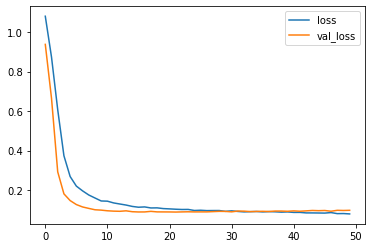

In [ ]:
losses[['loss', 'val_loss']].plot()

Accuracy

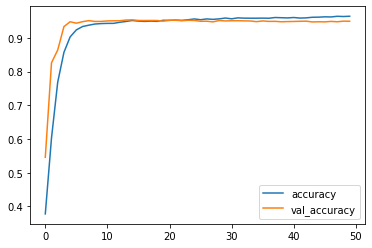

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

Confusion Matrix

In [ ]:
import numpy as np

# predictions = model.predict(X_test)
predictions = np.argmax(model.predict(X_test), axis=-1)
p_xgb = xgb.predict(X_test)
p_ov = ovr_s.predict(X_test)

In [ ]:
len(y_test[y_test==1])

593

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[2790    6   74]
 [  33  542   18]
 [ 154    3 2069]]


[]

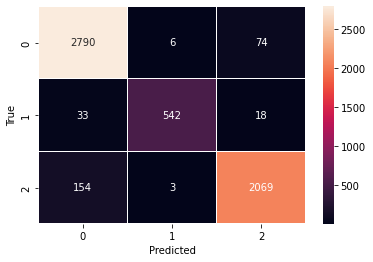

In [ ]:
# plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='d', linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

[]

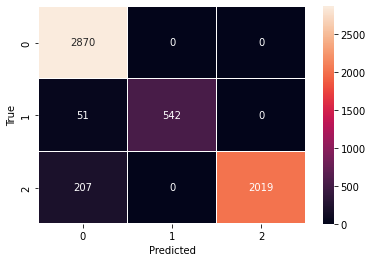

In [ ]:
sns.heatmap(confusion_matrix(y_test, p_xgb), annot=True,fmt='d', linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

[]

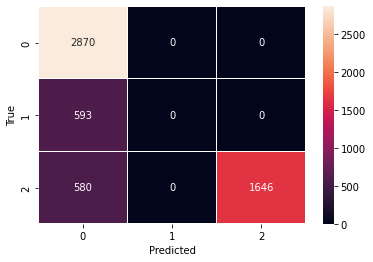

In [ ]:
sns.heatmap(confusion_matrix(y_test, p_ov), annot=True,fmt='d' ,linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

In [ ]:
# cmd line: tensorboard --logdir logs\fit 
list(le.classes_)

['Mitochondrial genetic inheritance disorders',
 'Multifactorial genetic inheritance disorders',
 'Single-gene inheritance diseases']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.94      0.97      0.95      2870
Multifactorial genetic inheritance disorders       0.98      0.91      0.95       593
            Single-gene inheritance diseases       0.96      0.93      0.94      2226

                                    accuracy                           0.95      5689
                                   macro avg       0.96      0.94      0.95      5689
                                weighted avg       0.95      0.95      0.95      5689



In [ ]:
print(classification_report(y_test,p_ov,target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.71      1.00      0.83      2870
Multifactorial genetic inheritance disorders       0.00      0.00      0.00       593
            Single-gene inheritance diseases       1.00      0.74      0.85      2226

                                    accuracy                           0.79      5689
                                   macro avg       0.57      0.58      0.56      5689
                                weighted avg       0.75      0.79      0.75      5689



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,p_xgb,target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.92      1.00      0.96      2870
Multifactorial genetic inheritance disorders       1.00      0.91      0.96       593
            Single-gene inheritance diseases       1.00      0.91      0.95      2226

                                    accuracy                           0.95      5689
                                   macro avg       0.97      0.94      0.95      5689
                                weighted avg       0.96      0.95      0.95      5689



###AutoEncoder


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
n_inputs = X_train.shape[1]
visible = tf.keras.layers.Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(round(float(n_inputs*1.50)))(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) *0.60)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(round(float(n_inputs*1.50)))(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
auto_enmodel = Model(inputs=visible, outputs=output)
# compile autoencoder model
auto_enmodel.compile(optimizer='adam', loss='mse')

In [ ]:
his = auto_enmodel.fit(X_train,X_train,epochs=250,batch_size = 128,validation_data=(X_test,X_test))

Epoch 1/250
104/104 [==============================] - 6s 21ms/step - loss: 0.2207 - val_loss: 0.1735
Epoch 2/250
104/104 [==============================] - 1s 14ms/step - loss: 0.1004 - val_loss: 0.1011
Epoch 3/250
104/104 [==============================] - 1s 13ms/step - loss: 0.0796 - val_loss: 0.0734
Epoch 4/250
104/104 [==============================] - 1s 14ms/step - loss: 0.0672 - val_loss: 0.0620
Epoch 5/250
104/104 [==============================] - 2s 14ms/step - loss: 0.0591 - val_loss: 0.0558
Epoch 6/250
104/104 [==============================] - 2s 17ms/step - loss: 0.0528 - val_loss: 0.0502
Epoch 7/250
104/104 [==============================] - 1s 9ms/step - loss: 0.0480 - val_loss: 0.0453
Epoch 8/250
104/104 [==============================] - 1s 8ms/step - loss: 0.0439 - val_loss: 0.0411
Epoch 9/250
104/104 [==============================] - 1s 8ms/step - loss: 0.0406 - val_loss: 0.0374
Epoch 10/250
104/104 [==============================] - 1s 8ms/step - loss: 0.0377 - 

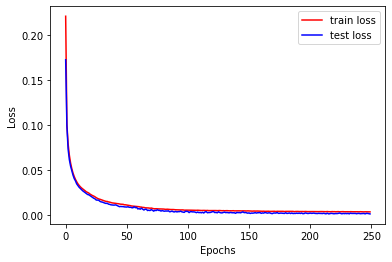

In [ ]:
plt.plot(range(250),his.history['loss'],c='r',label='train loss')
plt.plot(range(250),his.history['val_loss'],c='b',label='test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
X_traind[:2,:]

array([[ 1.005742  ,  2.518104  , -0.36010283, -0.6066062 , -0.61667883,
         0.36299455, -1.3314365 ,  3.6128874 ,  4.0941167 , -1.5729619 ,
         2.0679326 , -1.3361965 ,  0.30562514,  0.11942092,  3.8377934 ,
        -0.10640816,  0.00528284, -0.67567456, -1.7380147 , -2.0093923 ,
        -2.190014  ,  1.3696116 ,  0.10967164, -2.2351542 ,  1.6559969 ,
         0.94643104,  1.6140676 , -0.20671387, -0.767221  ,  1.3604866 ,
        -3.1078837 , -0.8312201 ,  1.1072087 ,  0.6496812 ,  0.8454066 ,
        -0.68746346,  1.2429553 ],
       [-2.0288763 ,  2.4186046 , -0.13719304,  0.72794   , -0.42162225,
         1.0888339 , -1.8244548 ,  0.25076562,  3.632131  , -2.019099  ,
         0.7962736 ,  0.02590694, -2.00236   , -1.1005168 , -3.121409  ,
        -1.2233964 , -1.595045  ,  2.5925927 , -1.0233707 , -2.1454532 ,
        -0.7868544 , -0.28901863,  1.4471688 , -1.3484943 , -1.1069397 ,
         1.1257007 ,  1.5253644 , -0.43474257, -0.7064362 , -1.4247878 ,
        -0.85539

In [ ]:
X_traind.shape

(13273, 37)

In [ ]:
enco = Model(inputs = visible,outputs=bottleneck)
X_traind = enco.predict(X_train)
X_testd = enco.predict(X_test)

In [ ]:
model_d  = Sequential()

model_d.add(Dense(43, activation='relu'))
model_d.add(Dropout(0.22))

model_d.add(Dense(48, activation='relu'))
model_d.add(Dropout(0.21))
model_d.add(BatchNormalization())

model_d.add(Dense(44, activation='relu'))
model_d.add(Dropout(0.21))
model_d.add(BatchNormalization())

model_d.add(Dense(35, activation='relu'))
model_d.add(Dropout(0.21))

model_d.add(Dense(11, activation='relu'))
model_d.add(Dropout(0.21))

model_d.add(Dense(3, activation='softmax'))

model_d.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

h = model_d.fit(x = X_traind, y = y_cat_train, epochs = 80, batch_size = 256, validation_data=(X_testd, y_cat_test), callbacks = [board])

Epoch 1/80
52/52 [==============================] - 2s 16ms/step - loss: 1.3477 - accuracy: 0.2765 - val_loss: 1.0035 - val_accuracy: 0.4899
Epoch 2/80
52/52 [==============================] - 0s 9ms/step - loss: 1.0054 - accuracy: 0.4731 - val_loss: 0.9524 - val_accuracy: 0.5045
Epoch 3/80
52/52 [==============================] - 0s 9ms/step - loss: 0.9776 - accuracy: 0.4941 - val_loss: 0.9467 - val_accuracy: 0.5045
Epoch 4/80
52/52 [==============================] - 1s 10ms/step - loss: 0.9577 - accuracy: 0.5095 - val_loss: 0.9253 - val_accuracy: 0.5045
Epoch 5/80
52/52 [==============================] - 0s 9ms/step - loss: 0.9336 - accuracy: 0.5194 - val_loss: 0.8842 - val_accuracy: 0.5075
Epoch 6/80
52/52 [==============================] - 1s 10ms/step - loss: 0.8832 - accuracy: 0.5560 - val_loss: 0.8145 - val_accuracy: 0.6393
Epoch 7/80
52/52 [==============================] - 0s 9ms/step - loss: 0.7977 - accuracy: 0.6176 - val_loss: 0.7051 - val_accuracy: 0.7778
Epoch 8/80
52/52 

In [ ]:
model_d.evaluate(X_testd,y_cat_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9413


[0.13844646513462067, 0.9412901997566223]

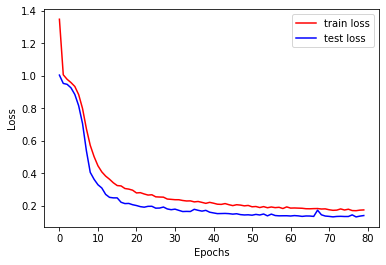

In [ ]:
plt.plot(range(80),h.history['loss'],c='r',label='train loss')
plt.plot(range(80),h.history['val_loss'],c='b',label='test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb_d = XGBClassifier(max_depth=9,n_estimators=170)
xgb_d.fit(X_traind,y_train)

XGBClassifier(max_depth=9, n_estimators=170, objective='multi:softprob')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,xgb_d.predict(X_testd)))

0.8899630866584637


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_sd = OneVsRestClassifier(SVC(C=0.3,kernel="rbf"))
ovr_sd.fit(X_traind,y_train)

OneVsRestClassifier(estimator=SVC(C=0.3))

In [ ]:
accuracy_score(y_test,ovr_sd.predict(X_testd))

0.852873967305326

[]

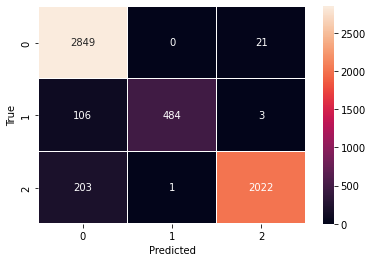

In [ ]:
pr = np.argmax(model_d.predict(X_testd), axis=-1)
sns.heatmap(confusion_matrix(y_test, pr), annot=True,fmt='d', linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pr,target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.90      0.99      0.95      2870
Multifactorial genetic inheritance disorders       1.00      0.82      0.90       593
            Single-gene inheritance diseases       0.99      0.91      0.95      2226

                                    accuracy                           0.94      5689
                                   macro avg       0.96      0.91      0.93      5689
                                weighted avg       0.95      0.94      0.94      5689



[]

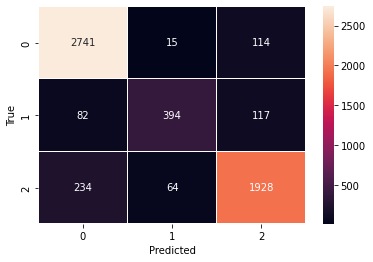

In [ ]:
sns.heatmap(confusion_matrix(y_test, xgb_d.predict(X_testd)), annot=True,fmt='d', linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

In [ ]:
print(classification_report(y_test,xgb_d.predict(X_testd),target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.90      0.96      0.92      2870
Multifactorial genetic inheritance disorders       0.83      0.66      0.74       593
            Single-gene inheritance diseases       0.89      0.87      0.88      2226

                                    accuracy                           0.89      5689
                                   macro avg       0.87      0.83      0.85      5689
                                weighted avg       0.89      0.89      0.89      5689



[]

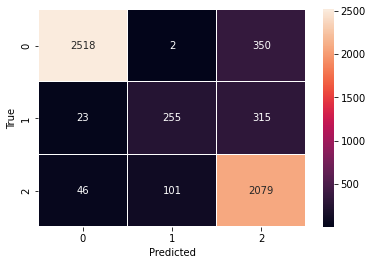

In [ ]:
sns.heatmap(confusion_matrix(y_test, ovr_sd.predict(X_testd)), annot=True,fmt='d', linewidths=0.3)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.plot()

In [ ]:
print(classification_report(y_test,ovr_sd.predict(X_testd),target_names=list(le.classes_)))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.97      0.88      0.92      2870
Multifactorial genetic inheritance disorders       0.71      0.43      0.54       593
            Single-gene inheritance diseases       0.76      0.93      0.84      2226

                                    accuracy                           0.85      5689
                                   macro avg       0.81      0.75      0.77      5689
                                weighted avg       0.86      0.85      0.85      5689

